In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from ipywidgets import *

Define some nonlinearities

In [2]:
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

In [3]:
def relu(x):
    return (x > 0)*x

For this notebook, we define our nonlinearity as $f := \frac{1}{1+e^{-x}}$

In [4]:
f = sigmoid

## One input, one output, one layer, width = 1

### Forward

This simplest case neural net has one input $x$ and one output $y$. In functional notation we have $ y = f(ax + b) $

In [5]:
def forward(a,b,x):
    return f(a*x + b)

In [6]:
forward(0.01, 0, 1)

0.5024999791668749

By training parameters a and b, this very simple neural network can nearly perfectly fit data from three types of functions. Step functions of the form $y = ax$, binary function of the form $y = a if, b if$, and logistic functions themselves, of the form $y = a f(x) + b$

In [7]:
x = np.linspace(-10,10,100)

def plt_one(a,b):
    plt.scatter(x,forward(a,b,x), color="blue")
    plt.show()
    
interact(plt_one, a=(-10,10,0.1), b=(-10,10,0.1))

<function __main__.plt_one>

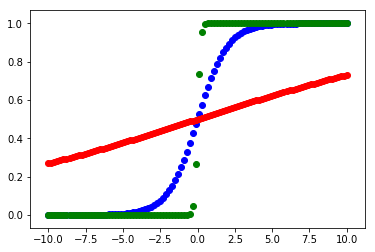

In [8]:
plt.scatter(x,forward(1,0,x), color="blue")
plt.scatter(x,forward(0.1,0,x), color="red")
plt.scatter(x,forward(10,0,x), color="green")

### Step Function $( a >> 1 )$
The step function occurs with relatively large $a$. That is, the $a$ parameter scales the input data to a much larger domain than the curved part of the logistic function.

The location of the step function can be controlled by using the $b$ parameter. Notice that the $b$ parameter is scaled by the $a$ parameter, so in our case with $a=10$, $b=90$ the step will be placed at $x=9$.

The direction of the step function is controlled by the sign of $a$.

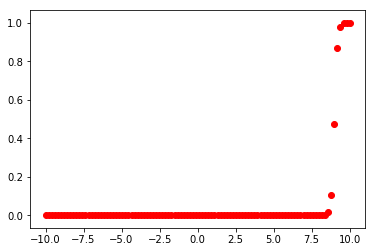

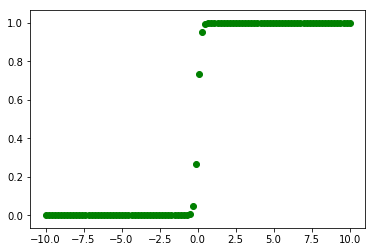

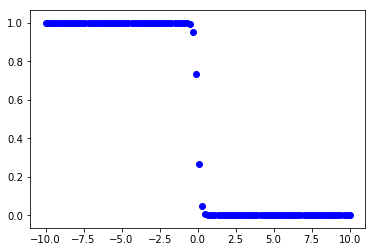

In [9]:
x = np.linspace(-10,10,100)
plt.scatter(x,forward(10,-90,x), color="red")
plt.show()
plt.scatter(x,forward(10,0,x), color="green")
plt.show()
plt.scatter(x,forward(-10,0,x), color="blue")
plt.show()

### Linear Function $( a << 1 )$

The linear function occurs with relatively small $a$. That is, the $a$ parameter scales the input data to a much smaller domain than the curved part of the logistic function.

The slope of the linear function can be somewhat controlled by setting the $b$ parameter. The direction of the slope can be controlled by the sign of the $a$ parameter.

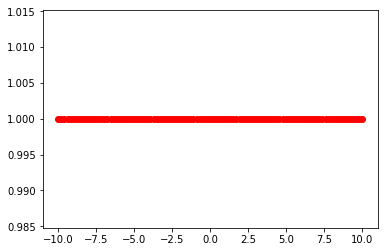

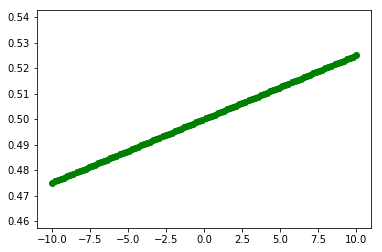

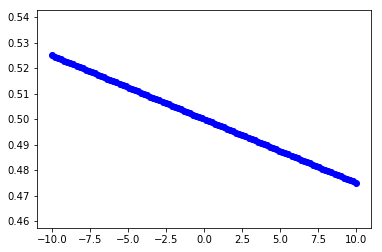

In [10]:
x = np.linspace(-10,10,100)
plt.scatter(x,forward(0.01,10,x), color="red")
plt.show()
plt.scatter(x,forward(0.01,0,x), color="green")
plt.show()
plt.scatter(x,forward(-0.01,0,x), color="blue")
plt.show()

### Sigmoid Function $( a = 1 )$

### Backprop

## One input, one output, two layers, width = 1

In [9]:
def forward_2(a,b,x):
    return f(a[1]*f(a[0]*x + b[0])+b[1])

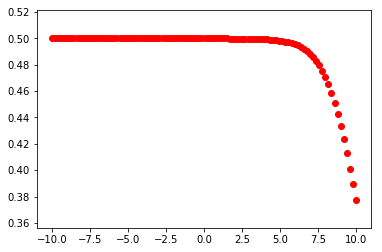

In [10]:
x = np.linspace(-10,10,100)
#plt.scatter(x,forward([1,1],[0,0],x), color="red")
plt.scatter(x,forward_2([1,-1],[-10,0],x), color="red")

## One input, one output, one layer, width = 2

In [13]:
def forward_1_2(a,b,x):
    return f(a[0][0]*x + b[0][0]) + f(a[0][1]*x + b[0][1])

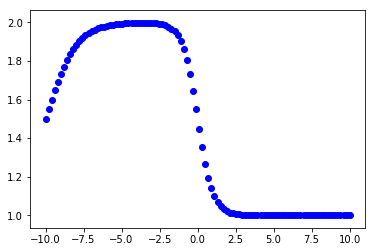

In [14]:
a = [[1,-2]]
b = [[10,0]]
x = np.linspace(-10,10,100)
plt.scatter(x,forward_1_2(a,b,x), color="blue")

In [12]:
x = np.linspace(-10,10,100)

def forward_1_2(a,b,x):
    return f(a[0][0]*x + b[0][0]) + f(a[0][1]*x + b[0][1])

def plt_1_2(a1=1,b1=0,a2=1,b2=0):
    plt.scatter(x,forward_1_2([[a1,a2]],[[b1,b2]],x), color="blue")
    plt.axis([-10,10,0,2])
    plt.show()
    
interact(plt_1_2, a1=(-10,10,0.1), b1=(-10,10,0.1), a2=(-10,10,0.1), b2=(-10,10,0.1))

<function __main__.plt_1_2>

## One input, one output, two layer, width = 1

In [11]:
x = np.linspace(-10,10,100)

def forward_1_2(a,b,x):
    return f(a[0][0]*(f(a[0][1]*x + b[0][1])) + b[0][0])

def plt_1_2(a1=1,b1=0,a2=1,b2=0):
    plt.scatter(x,forward_1_2([[a1,a2]],[[b1,b2]],x), color="blue")
    plt.axis([-10,10,0,1])
    plt.show()
    
interact(plt_1_2, a1=(-10,10,0.1), b1=(-10,10,0.1), a2=(-10,10,0.1), b2=(-10,10,0.1))

<function __main__.plt_1_2>